<h1 style="font-family:Impact,Arial;font-size:50px">Sanity check MWATS export from VAST</h1>
<p> The raw flux measurements are extracted form the VAST pipeline - this script checks that measurements presented in previous papers are reproduced in the latest analysis. 

The light-curves generated for the Bell et al. 2016, 2018 were created using a different algorithm with different filtering, however the main disribution of points should approximately be the same. 

In [2]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import statsmodels.api as sm # the stats module which contains state space modelling
import json
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [7]:
def distance_from_median_pos(df):
    degrees_to_radians = np.pi/180.0
    phi1 = df.ra*degrees_to_radians
    phi2 = df.med_ra*degrees_to_radians

    theta1 = df.dec*degrees_to_radians
    theta2 = df.med_dec*degrees_to_radians
    
    cosine = (np.cos(phi1)*np.cos(phi2)*np.cos(theta1 - theta2) +
           np.sin(phi1)*np.sin(phi2))
    dist_from_centre = np.arccos(cosine)
    return (dist_from_centre/3.142)*180

In [8]:
def plot_models(df, aic, models, burn):
    fig_1 , ax = plt.subplots(figsize=(13,10))
    for n in range(4): 
        plt.subplot(2,2,n+1)
        m = sm.tsa.UnobservedComponents(df, models[n])
        m_fit = m.fit()
        plt.plot(range(len(df)), df, label='Observations') # plots the original series
        predict_results = m_fit.get_prediction() # create one step ahead predictions using the Kalman filter
        predict_plot = predict_results.predicted_mean[burn:]
        plt.plot(range(len(predict_plot)), predict_plot, label='One-step ahead prediction')
        plt.title(models[n]+' AIC='+aic[n])
        plt.ylabel('Flux (Jy)')
        plt.xlabel('Time-series (#)')

## Load the data

In [9]:
%%time
# Load the raw data file.
raw_data = pd.read_feather('mwats_raw_data_Feb_SQL.fth')
#raw_data = raw_data.sort('jd')

CPU times: user 2.94 s, sys: 8.15 s, total: 11.1 s
Wall time: 25.4 s


# GLEAM J041022-523247

In [10]:
source = 29267.0
source_data = raw_data[raw_data.source_id == source]
file = '../sanity_check/GLEAM_J041022-523247.txt'
source = json.load(open(file))
fluxes = source['peak_flux']
errors = source['s_error']
s_time = source['jd_time']

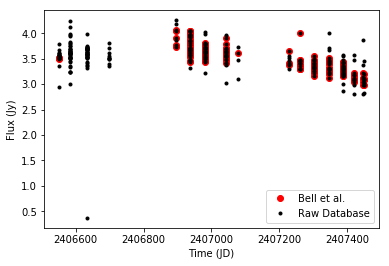

In [11]:
plt.plot(s_time, fluxes, 'ro', label='Bell et al.')
plt.plot(source_data.jd-50000, source_data.raw_peak_flux, 'k.', label='Raw Database')
plt.xlabel('Time (JD)')
plt.ylabel('Flux (Jy)')
plt.legend()

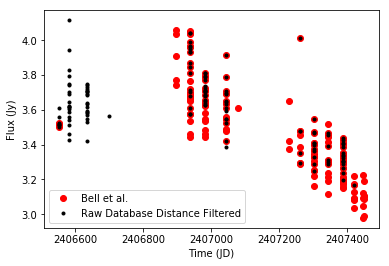

In [12]:
# Plot with distance filtering
source_filt = source_data[source_data.distance < 15.0]
plt.plot(s_time, fluxes, 'ro', label='Bell et al.')
plt.plot(source_filt.jd-50000, source_filt.raw_peak_flux, 'k.', label='Raw Database Distance Filtered')
plt.xlabel('Time (JD)')
plt.ylabel('Flux (Jy)')
plt.legend()

# J0953+0755

In [13]:
interesting = raw_data[ (raw_data.ra > 148.0) & (raw_data.ra < 148.5) & (raw_data.dec < 8.0) & (raw_data.dec > 7.0)]

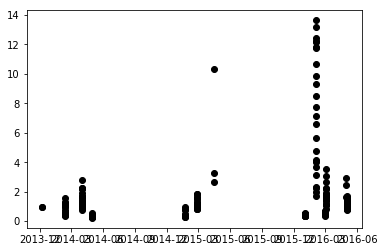

In [14]:
J0953 = raw_data[raw_data.source_id==243604.0]
plt.plot(J0953.time, J0953.raw_peak_flux, 'ko')

In [15]:
def plot_models(df, aic, models, burn):
    fig_1 , ax = plt.subplots(figsize=(13,10))
    for n in range(4): 
        plt.subplot(2,2,n+1)
        m = sm.tsa.UnobservedComponents(df, models[n])
        m_fit = m.fit()
        plt.plot(range(len(df)), df, label='Observations') # plots the original series
        predict_results = m_fit.get_prediction() # create one step ahead predictions using the Kalman filter
        predict_plot = predict_results.predicted_mean[burn:]
        plt.plot(range(len(predict_plot)), predict_plot, label='One-step ahead prediction')
        plt.title(models[n]+' AIC='+aic[n])
        plt.ylabel('Flux (Jy)')
        plt.xlabel('Time-series (#)')
    

In [34]:
J0953.index = pd.to_datetime(J0953.time)
J0953 = J0953.sort_values(by='jd')
df = J0953.iloc[:, 15]
df.head()

time
2013-12-07 07:03:31.000000    0.988842
2013-12-07 07:09:31.000000    0.928762
2014-02-11 03:01:31.000000    0.458272
2014-02-11 03:07:30.000009    0.380216
2014-02-11 03:13:30.000008    0.420981
Name: raw_peak_flux, dtype: float64

/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associ

local level


/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associ

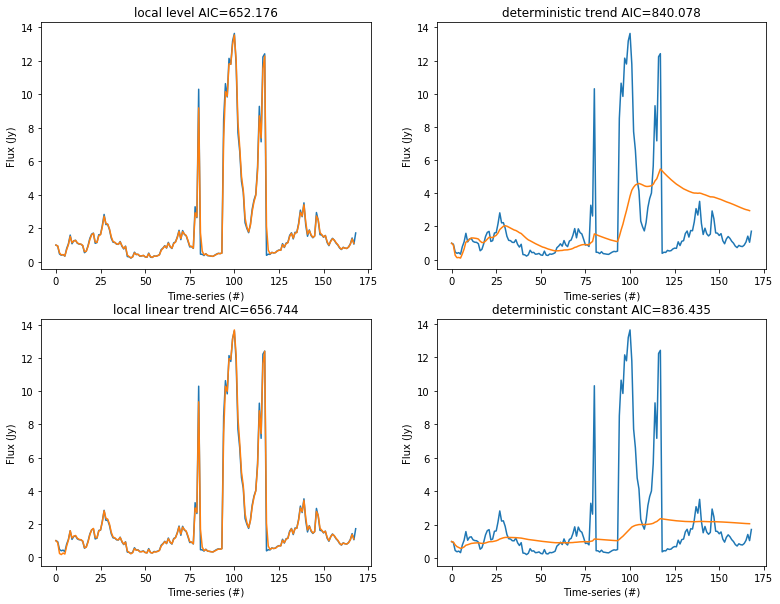

In [17]:
# Test State Space Model
best_model = []
aic = []
models = ['local level', 'deterministic trend', 'local linear trend', 'deterministic constant']
for model in models:
    level_model = sm.tsa.UnobservedComponents(df, model)
    level_results = level_model.fit()
    out = level_results.summary()
    parse = out.as_text()
    parse = parse.split()

    param = parse[parse.index('AIC') + 1]
    aic.append(param)
    best_model.append(float(param))

pref_model = models[(best_model.index(min(best_model)))]
print(pref_model)
plot_models(df, aic, models, burn=1)

/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


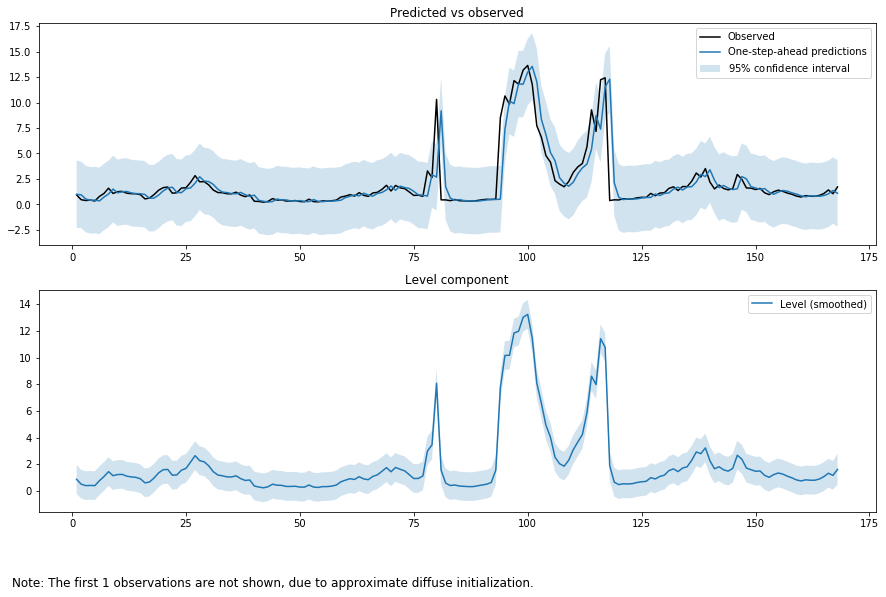

In [43]:
level_model = sm.tsa.UnobservedComponents(df, level=True, trend=False, stochastic_level=True, stochastic_trend=False, irregular=True)
level_results = level_model.fit()
fig = level_results.plot_components(figsize=(15, 9));

# GLEAM J032320+053413

In [19]:
interesting = raw_data[ (raw_data.ra > 50.0) & (raw_data.ra < 51.0) & (raw_data.dec < 6.0) & (raw_data.dec > 5.0)]

In [20]:
source = 237262.0
source_data = raw_data[raw_data.source_id == source]
file = '../sanity_check/GLEAM_J032320+053413.txt'
source = json.load(open(file))
fluxes = source['peak_flux']
errors = source['s_error']
s_time = source['jd_time']

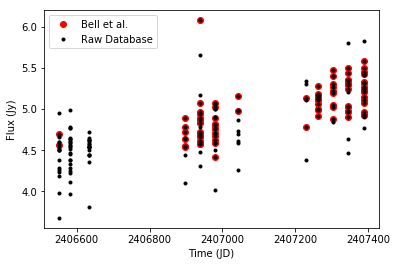

In [21]:
plt.plot(s_time, fluxes, 'ro', label='Bell et al.')
plt.plot(source_data.jd-50000, source_data.raw_peak_flux, 'k.', label='Raw Database')
plt.xlabel('Time (JD)')
plt.ylabel('Flux (Jy)')
plt.legend()

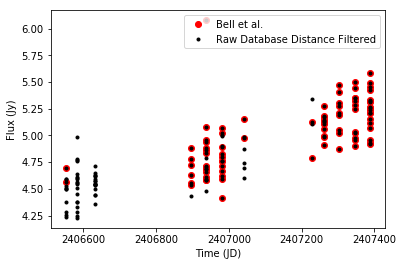

In [22]:
# Plot with distance filtering
source_filt = source_data[source_data.distance < 15.0]
plt.plot(s_time, fluxes, 'ro', label='Bell et al.')
plt.plot(source_filt.jd-50000, source_filt.raw_peak_flux, 'k.', label='Raw Database Distance Filtered')
plt.xlabel('Time (JD)')
plt.ylabel('Flux (Jy)')
plt.legend()

In [23]:
source_filt.index = pd.to_datetime(source_filt.time)
source_filt = source_filt.sort_values(by='jd')
df = source_filt.iloc[:, 15]
df.head()

time
2013-09-17 04:58:39.000000    4.255360
2013-09-17 05:04:39.000000    4.283118
2013-09-17 05:10:38.000008    4.379833
2013-09-17 05:16:38.000008    4.505787
2013-09-17 05:22:39.000000    4.501580
Name: raw_peak_flux, dtype: float64

/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associ

local level


/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


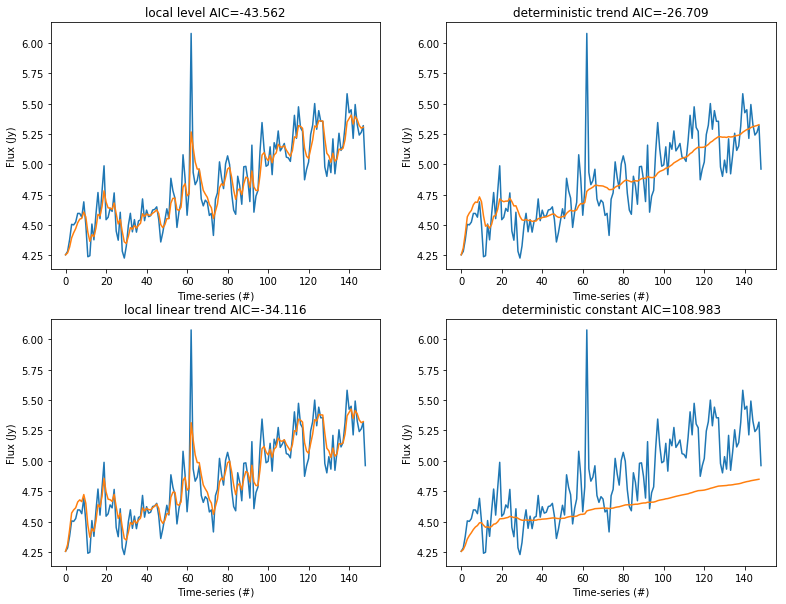

In [24]:
# Test State Space Model
best_model = []
aic = []
models = ['local level', 'deterministic trend', 'local linear trend', 'deterministic constant']
for model in models:
    level_model = sm.tsa.UnobservedComponents(df, model)
    level_results = level_model.fit()
    out = level_results.summary()
    parse = out.as_text()
    parse = parse.split()
    param = parse[parse.index('AIC') + 1]
    aic.append(param)
    best_model.append(float(param))

pref_model = models[(best_model.index(min(best_model)))]
print(pref_model)
plot_models(df, aic, models, burn=1)

/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-43.56233695183269

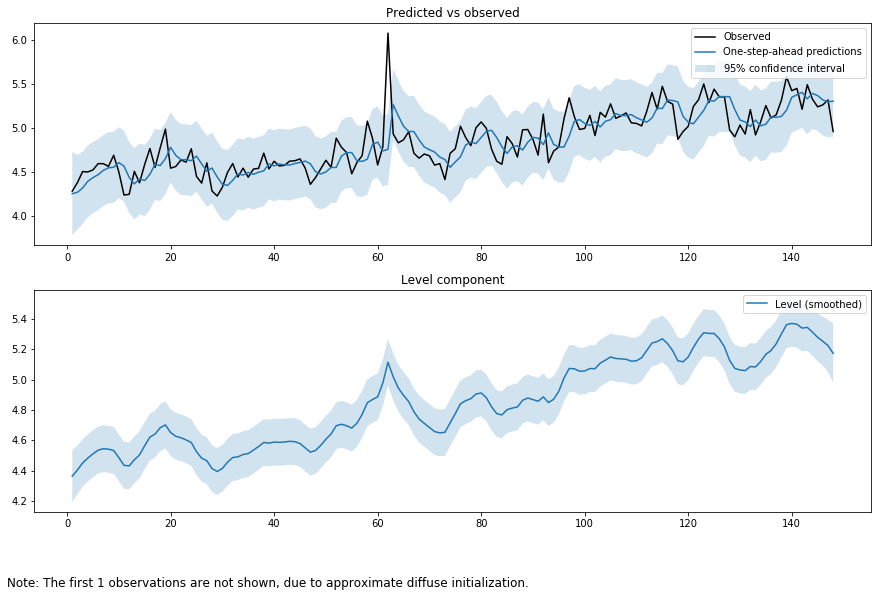

In [32]:
level_model = sm.tsa.UnobservedComponents(df, level=True, trend=False, stochastic_level=True, stochastic_trend=True, irregular=True)
level_results = level_model.fit()
fig = level_results.plot_components(figsize=(15, 9));
level_results.aic

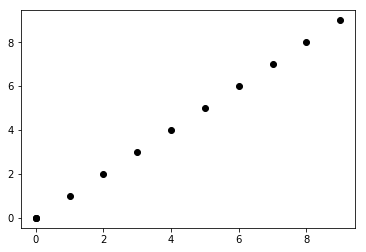

In [26]:
fig2 = plt.figure()

def animate(i):
    #level_model = sm.tsa.UnobservedComponents(df[0:i+3], level=False, trend=True, stochastic_level=False, stochastic_trend=True, irregular=False)  
    #level_results = level_model.fit()
    #level_results.plot_components(figsize=(15, 9))
    p = plt.plot(i, i, 'ko')
    #im.xlim(0,len(df))    

#ani = matplotlib.animation.FuncAnimation(fig, animate, frames=(len(df)-3), repeat=True)
ani = matplotlib.animation.FuncAnimation(fig2, animate, frames=10, repeat=True)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

ani.save('test.mp4')


In [27]:
df[0:8]

time
2013-09-17 04:58:39.000000    4.255360
2013-09-17 05:04:39.000000    4.283118
2013-09-17 05:10:38.000008    4.379833
2013-09-17 05:16:38.000008    4.505787
2013-09-17 05:22:39.000000    4.501580
2013-09-17 05:28:39.000000    4.524465
2013-09-17 05:34:39.000000    4.595918
2013-09-17 05:40:39.000000    4.595667
Name: raw_peak_flux, dtype: float64

/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/structural.py:478: SpecificationWarning: Trend component specified without level component; deterministic level component added.
  " deterministic level component added.", SpecificationWarning)
/Users/134393/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


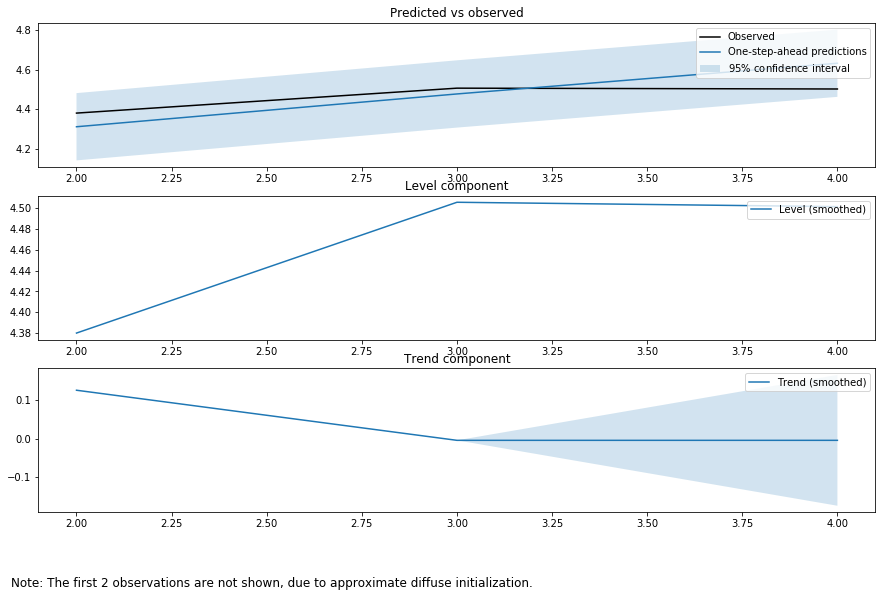

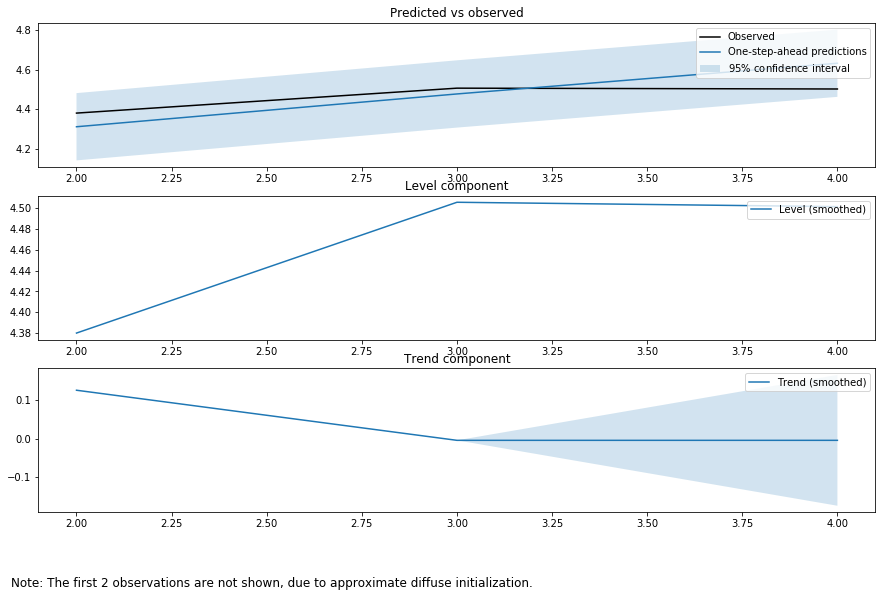

In [28]:
level_model = sm.tsa.UnobservedComponents(df[0:5], level=False, trend=True, stochastic_level=False, stochastic_trend=True, irregular=False)        
level_results = level_model.fit()
level_results.plot_components(figsize=(15, 9))

In [29]:
df[0:10]


time
2013-09-17 04:58:39.000000    4.255360
2013-09-17 05:04:39.000000    4.283118
2013-09-17 05:10:38.000008    4.379833
2013-09-17 05:16:38.000008    4.505787
2013-09-17 05:22:39.000000    4.501580
2013-09-17 05:28:39.000000    4.524465
2013-09-17 05:34:39.000000    4.595918
2013-09-17 05:40:39.000000    4.595667
2013-09-17 05:52:38.000009    4.564955
2013-09-17 06:10:39.000000    4.691221
Name: raw_peak_flux, dtype: float64